In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, recall_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
df_movie = pd.read_csv("data_movies_v3.csv")
df_movie.head()

,index,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,History,Music,War,Documentary,Western,Foreign,TV Movie,num_of_production_companies,sentiment,subjective
0,0,237000000,Action Adventure Fantasy Science Fiction,19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,0,0,0,0,0,0,0,4,0.041667,0.616667
1,1,300000000,Adventure Fantasy Action,285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,0,0,0,0,0,0,0,3,-0.083333,0.266667
2,2,245000000,Action Adventure Crime,206647,en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,0,0,0,0,0,0,0,3,-0.306250,0.518750
3,3,250000000,Action Crime Drama Thriller,49026,en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,0,0,0,0,0,0,0,4,-0.044805,0.372078
4,4,260000000,Action Adventure Science Fiction,49529,en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,0,0,0,0,0,0,0,1,-0.016667,0.566667


In [43]:
df_for_model = df_movie[(df_movie[['budget','popularity','revenue', 'runtime','vote_average', 'vote_count', 'sentiment','subjective']] != 0).all(axis=1)]
df_for_model = df_for_model.loc[:, ['budget','popularity','revenue', 'runtime','vote_average', 'vote_count','Drama','Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime','Science Fiction', 'Horror', 'Family', 'Fantasy', 'Mystery','Animation', 'History', 'Music', 'War', 'Documentary', 'Western','Foreign', 'num_of_production_companies', 'sentiment','subjective']]


In [44]:
#Here we categorize popularity into three classes low, average and high represented by 0, 1 and 2

In [45]:
# Define the popularity categories
popularity_bins = [-1, 50, 100, float('inf')]
popularity_labels = [0, 1, 2]

# Convert the "popularity" column into categories
df_for_model['popularity'] = pd.cut(df_for_model['popularity'], bins=popularity_bins, labels=popularity_labels)

In [46]:
#Here we categorize movie into three classes hit, average and miss represented by 2, 1 and 0
pd.set_option('float_format', '{:f}'.format)
df_for_model['revenue'].describe()

count         2931.000000
mean     123144981.276015
std      187021342.284266
min              5.000000
25%       17289340.000000
50%       56702901.000000
75%      149484694.500000
max     2787965087.000000
Name: revenue, dtype: float64

In [47]:
# Define the conditions and assign values to "hit_average_miss"
df_for_model['hit_average_miss'] = 0  # Initialize with a default value
df_for_model.loc[df_for_model['revenue'] >= 2 * df_for_model['budget'], 'hit_average_miss'] = 2
df_for_model.loc[(df_for_model['budget'] <= df_for_model['revenue']) & (df_for_model['revenue'] < 2 * df_for_model['budget']), 'hit_average_miss'] = 1


In [48]:
df_for_model["revenue"].isna().sum()

0

Accuracy: 0.8977853492333902
Precision: 0.897740393565712
Recall: 0.8977853492333902
F1 Score: 0.896852831087641


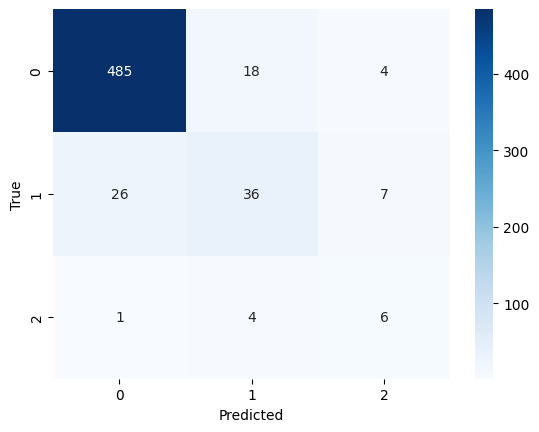

In [49]:
#Sanity Check
X= df_for_model.drop(['popularity','revenue','hit_average_miss'], axis=1)
y = df_for_model['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Decision Tree Classifier model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Mean Squared Error: 6969193137001758.0
Square root of Mean Squared Error: 83481693.42437753
R-squared value: 0.7499436839585167


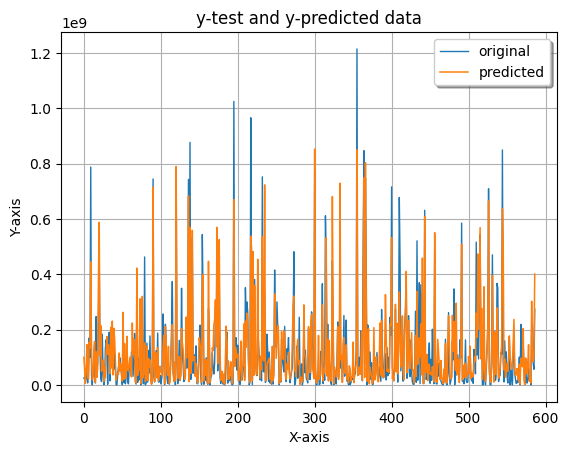

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

#Sanity Check
X= df_for_model.drop(['popularity','revenue','hit_average_miss'], axis=1)
y = df_for_model['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Scale input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Decision Tree Classifier model

model = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators =105,max_depth=50, min_samples_split= 10, random_state= 0))
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
model.score(X_test, y_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Square root of Mean Squared Error:", np.sqrt(mse))
print("R-squared value:", model.score(X_test, y_test))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [51]:
y_pred

array([9.96074364e+07, 6.09854230e+07, 5.58362255e+06, 5.14831489e+07,
       1.45928013e+08, 3.93347618e+07, 2.11890949e+07, 1.54207819e+08,
       1.32972993e+08, 4.45213807e+08, 9.71268644e+07, 1.83323584e+07,
       2.97945061e+07, 1.27933415e+08, 1.57261450e+08, 8.74537930e+06,
       1.19903834e+08, 2.73609174e+07, 5.87457864e+07, 3.81872082e+08,
       5.88077944e+08, 1.05347339e+08, 2.14858950e+08, 4.98662359e+07,
       8.56690595e+07, 8.97007441e+07, 1.21663463e+07, 6.42220040e+07,
       2.67313469e+07, 1.21445733e+08, 1.74953361e+08, 1.11259784e+08,
       1.44904782e+08, 1.02949717e+08, 4.15692095e+07, 2.08216877e+08,
       6.11078493e+07, 2.30994444e+08, 3.60805880e+07, 2.04779901e+08,
       1.69387616e+08, 8.96996223e+07, 1.57237086e+07, 3.80113197e+07,
       3.97245613e+07, 3.77382616e+07, 1.15474618e+08, 4.92681380e+07,
       7.57747059e+07, 5.93771031e+07, 1.37195224e+07, 2.62566637e+08,
       2.05763317e+07, 1.50121330e+08, 2.30001963e+07, 3.10558683e+07,
      

Mean Squared Error: 8120250824502070.0
Square root of Mean Squared Error: 90112434.35010548
R-squared value: 0.6876318195260636


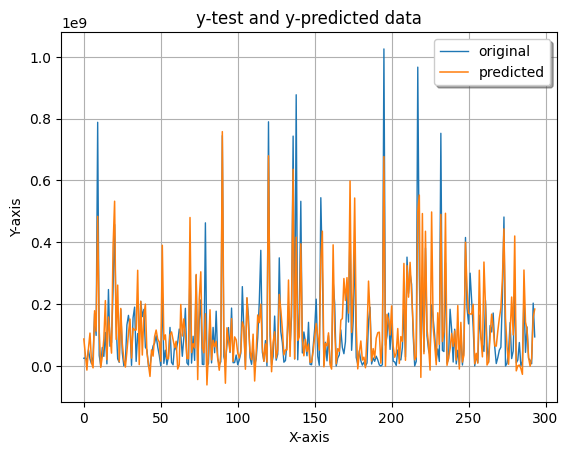

In [104]:
#Sanity Check
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale,
)
X= df_for_model.drop(['popularity', "revenue",'hit_average_miss'], axis=1)
y = df_for_model['revenue']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Optional: Scale input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Decision Tree regression model
model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=100000000, tol=1e-30))
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Square root of Mean Squared Error:", np.sqrt(mse))
print("R-squared value:", model.score(X_test, y_test))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [ ]:
X_train

array([[4.47368396e-02, 2.36714976e-01, 2.00000000e-01, ...,
        1.53846154e-01, 5.30000000e-01, 3.12820513e-01],
       [5.26315765e-02, 3.09178744e-01, 8.18181818e-01, ...,
        3.84615385e-02, 4.37500000e-01, 1.79487179e-01],
       [4.60526314e-01, 4.54106280e-01, 5.27272727e-01, ...,
        1.53846154e-01, 4.86666667e-01, 5.17948718e-01],
       ...,
       [9.73684187e-02, 3.09178744e-01, 4.00000000e-01, ...,
        7.69230769e-02, 6.85000000e-01, 6.82051282e-01],
       [7.63157897e-08, 1.78743961e-01, 5.45454545e-01, ...,
        1.15384615e-01, 6.05555556e-01, 4.01709402e-01],
       [1.57894735e-01, 4.00966184e-01, 4.72727273e-01, ...,
        1.53846154e-01, 5.35000000e-01, 4.56410256e-01]])